# PROJECT : DATA WRANGLING

BY: RITIKA MANDAL


## CONTENTS:

>1.> DATA GATHERING

>2.> DATA ASSESSING

>3.> DATA CLEANING

## DATA GATHERING STEP ##

In [38]:
import pandas as pd
import numpy as np
import requests
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import csv

wr_dogs= pd.read_csv("twitter-archive-enhanced.csv")
wr_dogs.head()



tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

In [2]:
r = requests.get(' https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
with open("image_predictions.tsv", mode = "wb") as file:
    file.write(r.content)

In [3]:
img_pred = pd.read_csv("image_predictions.tsv", sep='\t')
img_pred.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature_pinscher  0.222752    True  
4  0.243682    True             Doberman  0.154629    True

In [4]:
tweet_ids = wr_dogs.tweet_id.values
len(tweet_ids)


2356

In [5]:
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

#access the API
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [7]:
count=0
fails_dict = {}
start = timer()
with open('tweet_json.txt', 'w') as outfile:
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Fail
262: 842846295480000512
Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Success
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293

Success
519: 810657578271330305
Success
520: 810284430598270976
Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success


Success
776: 776201521193218049
Success
777: 776113305656188928
Success
778: 776088319444877312
Success
779: 775898661951791106
Success
780: 775842724423557120
Success
781: 775733305207554048
Success
782: 775729183532220416
Success
783: 775364825476165632
Success
784: 775350846108426240
Success
785: 775096608509886464
Fail
786: 775085132600442880
Success
787: 774757898236878852
Success
788: 774639387460112384
Success
789: 774314403806253056
Success
790: 773985732834758656
Success
791: 773922284943896577
Success
792: 773704687002451968
Success
793: 773670353721753600
Success
794: 773547596996571136
Success
795: 773336787167145985
Success
796: 773308824254029826
Success
797: 773247561583001600
Success
798: 773191612633579521
Success
799: 772877495989305348
Success
800: 772826264096874500
Success
801: 772615324260794368
Success
802: 772581559778025472
Success
803: 772193107915964416
Success
804: 772152991789019136
Success
805: 772117678702071809
Success
806: 772114945936949249
Success
807

Success
1032: 745422732645535745
Success
1033: 745314880350101504
Success
1034: 745074613265149952
Success
1035: 745057283344719872
Success
1036: 744995568523612160
Success
1037: 744971049620602880
Success
1038: 744709971296780288
Success
1039: 744334592493166593
Success
1040: 744234799360020481
Success
1041: 744223424764059648
Success
1042: 743980027717509120
Success
1043: 743895849529389061
Success
1044: 743835915802583040
Success
1045: 743609206067040256
Success
1046: 743595368194129920
Success
1047: 743545585370791937
Success
1048: 743510151680958465
Success
1049: 743253157753532416
Success
1050: 743222593470234624
Success
1051: 743210557239623680
Success
1052: 742534281772302336
Success
1053: 742528092657332225
Success
1054: 742465774154047488
Success
1055: 742423170473463808
Success
1056: 742385895052087300
Success
1057: 742161199639494656
Success
1058: 742150209887731712
Success
1059: 741793263812808706
Success
1060: 741743634094141440
Success
1061: 741438259667034112
Success
10

Success
1281: 708834316713893888
Success
1282: 708810915978854401
Success
1283: 708738143638450176
Success
1284: 708711088997666817
Success
1285: 708479650088034305
Success
1286: 708469915515297792
Success
1287: 708400866336894977
Success
1288: 708356463048204288
Success
1289: 708349470027751425
Success
1290: 708149363256774660
Success
1291: 708130923141795840
Success
1292: 708119489313951744
Success
1293: 708109389455101952
Success
1294: 708026248782585858
Success
1295: 707995814724026368
Success
1296: 707983188426153984
Success
1297: 707969809498152960
Success
1298: 707776935007539200
Success
1299: 707741517457260545
Success
1300: 707738799544082433
Success
1301: 707693576495472641
Success
1302: 707629649552134146
Success
1303: 707610948723478529
Success
1304: 707420581654872064
Success
1305: 707411934438625280
Success
1306: 707387676719185920
Success
1307: 707377100785885184
Success
1308: 707315916783140866
Success
1309: 707297311098011648
Success
1310: 707059547140169728
Success
13

Success
1530: 690248561355657216
Success
1531: 690021994562220032
Success
1532: 690015576308211712
Success
1533: 690005060500217858
Success
1534: 689999384604450816
Success
1535: 689993469801164801
Success
1536: 689977555533848577
Success
1537: 689905486972461056
Success
1538: 689877686181715968
Success
1539: 689835978131935233
Success
1540: 689661964914655233
Success
1541: 689659372465688576
Success
1542: 689623661272240129
Success
1543: 689599056876867584
Success
1544: 689557536375177216
Success
1545: 689517482558820352
Success
1546: 689289219123089408
Success
1547: 689283819090870273
Success
1548: 689280876073582592
Success
1549: 689275259254616065
Success
1550: 689255633275777024
Success
1551: 689154315265683456
Success
1552: 689143371370250240
Success
1553: 688916208532455424
Success
1554: 688908934925697024
Success
1555: 688898160958271489
Success
1556: 688894073864884227
Success
1557: 688828561667567616
Success
1558: 688804835492233216
Success
1559: 688789766343622656
Success
15

Success
1779: 677895101218201600
Success
1780: 677716515794329600
Success
1781: 677700003327029250
Success
1782: 677698403548192770
Success
1783: 677687604918272002
Success
1784: 677673981332312066
Success
1785: 677662372920729601
Success
1786: 677644091929329666
Success
1787: 677573743309385728
Success
1788: 677565715327688705
Success
1789: 677557565589463040
Success
1790: 677547928504967168
Success
1791: 677530072887205888
Success
1792: 677335745548390400
Success
1793: 677334615166730240
Success
1794: 677331501395156992
Success
1795: 677328882937298944
Success
1796: 677314812125323265
Success
1797: 677301033169788928
Success
1798: 677269281705472000
Success
1799: 677228873407442944
Success
1800: 677187300187611136
Success
1801: 676975532580409345
Success
1802: 676957860086095872
Success
1803: 676949632774234114
Success
1804: 676948236477857792
Success
1805: 676946864479084545
Success
1806: 676942428000112642
Success
1807: 676936541936185344
Success
1808: 676916996760600576
Success
18

Success
2028: 671874878652489728
Success
2029: 671866342182637568
Success
2030: 671855973984772097
Success
2031: 671789708968640512
Success
2032: 671768281401958400
Success
2033: 671763349865160704
Success
2034: 671744970634719232
Success
2035: 671743150407421952
Success
2036: 671735591348891648
Success
2037: 671729906628341761
Success
2038: 671561002136281088
Success
2039: 671550332464455680
Success
2040: 671547767500775424
Success
2041: 671544874165002241
Success
2042: 671542985629241344
Success
2043: 671538301157904385
Success
2044: 671536543010570240
Success
2045: 671533943490011136
Success
2046: 671528761649688577
Success
2047: 671520732782923777
Success
2048: 671518598289059840
Success
2049: 671511350426865664
Success
2050: 671504605491109889
Success
2051: 671497587707535361
Success
2052: 671488513339211776
Success
2053: 671486386088865792
Success
2054: 671485057807351808
Success
2055: 671390180817915904
Success
2056: 671362598324076544
Success
2057: 671357843010908160
Success
20

Success
2278: 667437278097252352
Success
2279: 667435689202614272
Success
2280: 667405339315146752
Success
2281: 667393430834667520
Success
2282: 667369227918143488
Success
2283: 667211855547486208
Success
2284: 667200525029539841
Success
2285: 667192066997374976
Success
2286: 667188689915760640
Success
2287: 667182792070062081
Success
2288: 667177989038297088
Success
2289: 667176164155375616
Success
2290: 667174963120574464
Success
2291: 667171260800061440
Success
2292: 667165590075940865
Success
2293: 667160273090932737
Success
2294: 667152164079423490
Success
2295: 667138269671505920
Success
2296: 667119796878725120
Success
2297: 667090893657276420
Success
2298: 667073648344346624
Success
2299: 667070482143944705
Success
2300: 667065535570550784
Success
2301: 667062181243039745
Success
2302: 667044094246576128
Success
2303: 667012601033924608
Success
2304: 666996132027977728
Success
2305: 666983947667116034
Success
2306: 666837028449972224
Success
2307: 666835007768551424
Success
23

In [8]:
api_data = []

#read the created file
with open("tweet_json.txt", "r") as f:
    for line in f:
        try: 
            tweet = json.loads(line)
            #append a dictionary to the created list            
            api_data.append({
                "tweet_id": tweet["id"],
                "retweet_count": tweet["retweet_count"],
                "favorite_count": tweet["favorite_count"],
                "retweeted": tweet["retweeted"],
                "display_text_range": tweet["display_text_range"]                
            })               
                
            #tweet["entities"]["media"][0]["media_url"]
        except:
            print("Error.") 
            
df_api = pd.DataFrame(api_data, columns = ["tweet_id", "retweet_count", "favorite_count", "retweeted", "display_text_range"])


In [9]:
df_api.head()

tweet_id  retweet_count  favorite_count  retweeted  \
0  892420643555336193           7711           36230      False   
1  892177421306343426           5699           31251      False   
2  891815181378084864           3778           23528      False   
3  891689557279858688           7875           39533      False   
4  891327558926688256           8484           37746      False   

  display_text_range  
0            [0, 85]  
1           [0, 138]  
2           [0, 121]  
3            [0, 79]  
4           [0, 138]

## DATA ACCESSING STEP ##

In [10]:
wr_dogs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [11]:
img_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [12]:
df_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 5 columns):
tweet_id              2331 non-null int64
retweet_count         2331 non-null int64
favorite_count        2331 non-null int64
retweeted             2331 non-null bool
display_text_range    2331 non-null object
dtypes: bool(1), int64(3), object(1)
memory usage: 75.2+ KB


In [41]:
all_columns = pd.Series(list(wr_dogs) + list(img_pred) + list(df_api))
all_columns[all_columns.duplicated()]

17    tweet_id
29    tweet_id
dtype: object

In [13]:
wr_dogs.isnull().sum(axis = 0)

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [43]:
wr_dogs.describe()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
count  2.356000e+03           7.800000e+01         7.800000e+01   
mean   7.427716e+17           7.455079e+17         2.014171e+16   
std    6.856705e+16           7.582492e+16         1.252797e+17   
min    6.660209e+17           6.658147e+17         1.185634e+07   
25%    6.783989e+17           6.757419e+17         3.086374e+08   
50%    7.196279e+17           7.038708e+17         4.196984e+09   
75%    7.993373e+17           8.257804e+17         4.196984e+09   
max    8.924206e+17           8.862664e+17         8.405479e+17   

       retweeted_status_id  retweeted_status_user_id  rating_numerator  \
count         1.810000e+02              1.810000e+02       2356.000000   
mean          7.720400e+17              1.241698e+16         13.126486   
std           6.236928e+16              9.599254e+16         45.876648   
min           6.661041e+17              7.832140e+05          0.000000   
25%           7.186315e+17              4.196984e+09         10.000000   
50%           7.804657e+17              4.196984e+09         11.000000   
75%           8.203146e+17              4.196984e+09         12.000000   
max           8.874740e+17              7.874618e+17       1776.000000   

       rating_denominator  
count         2356.000000  
mean            10.455433  
std              6.745237  
min              0.000000  
25%             10.000000  
50%             10.000000  
75%             10.000000  
max            170.000000

In [44]:
img_pred.describe()

tweet_id      img_num      p1_conf       p2_conf       p3_conf
count  2.075000e+03  2075.000000  2075.000000  2.075000e+03  2.075000e+03
mean   7.384514e+17     1.203855     0.594548  1.345886e-01  6.032417e-02
std    6.785203e+16     0.561875     0.271174  1.006657e-01  5.090593e-02
min    6.660209e+17     1.000000     0.044333  1.011300e-08  1.740170e-10
25%    6.764835e+17     1.000000     0.364412  5.388625e-02  1.622240e-02
50%    7.119988e+17     1.000000     0.588230  1.181810e-01  4.944380e-02
75%    7.932034e+17     1.000000     0.843855  1.955655e-01  9.180755e-02
max    8.924206e+17     4.000000     1.000000  4.880140e-01  2.734190e-01

In [45]:
df_api.describe()

tweet_id  retweet_count  favorite_count
count  2.331000e+03    2331.000000     2331.000000
mean   7.419079e+17    2705.750751     7567.303303
std    6.823170e+16    4575.399972    11746.164734
min    6.660209e+17       1.000000        0.000000
25%    6.782670e+17     548.000000     1319.500000
50%    7.182469e+17    1268.000000     3289.000000
75%    7.986692e+17    3143.500000     9263.500000
max    8.924206e+17   77860.000000   156329.000000

In [46]:
sum(wr_dogs.duplicated())

0

In [47]:
wr_dogs.name.value_counts()

None         745
a             55
Charlie       12
Oliver        11
Cooper        11
Lucy          11
Lola          10
Tucker        10
Penny         10
Bo             9
Winston        9
the            8
Sadie          8
Buddy          7
Daisy          7
an             7
Toby           7
Bailey         7
Bella          6
Jack           6
Jax            6
Leo            6
Stanley        6
Scout          6
Oscar          6
Rusty          6
Dave           6
Koda           6
Milo           6
Sammy          5
            ... 
Combo          1
Zara           1
Gordon         1
Mimosa         1
Amélie         1
Flurpson       1
Bradley        1
Grizzwald      1
Arnold         1
Shawwn         1
Sundance       1
Coleman        1
Coopson        1
Trigger        1
Boots          1
Diogi          1
Edgar          1
Kane           1
Kallie         1
Zuzu           1
Emma           1
Jimbo          1
Gabby          1
Rumble         1
Tito           1
Bobb           1
Mac            1
Sprinkles     

In [48]:
(wr_dogs.query('doggo=="None" and floofer=="None" and pupper=="None" and puppo=="None"')).shape[0]

1976

In [49]:
(img_pred.query('p1_dog==False and p2_dog==False and p3_dog==False')).shape[0]

324

In [50]:
sum(img_pred.duplicated())

0

In [51]:
wr_dogs.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [52]:
wr_dogs.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

## QUALITY AND TIDINESS ISSUES

There are several quality and tidiness issues associated with the given datasets:

> **CLEANLINESS ISSUES**
##### 1.> In the dataset WeRateDogs, the tweet_id datatype is int64, whereas datatype must be string.
##### 2.> The timestamp in the dataset has a datatype of string whereas it should be a datetime object.
##### 3.> Similarly in img_pred(image prediction dataset) as well as the df_api (the twitter dataset) the twitter id has a datatype of int. The datatype will be of the string type.
##### 4.> In the WeRateDogs dataset, the names of some of the dog breeds are incorrect. For example, None a, an etc. which are not supposed to be dog names.
##### 5.> Also in the we rate dogs dataset there are some non null values for the retweets.
##### 6.> There are reviews for the rows where doggo, floofer, pupper and puppo are all set to None. There are around 1976 rows of that type.
##### 7.> In the img_pred(image) dataset, some of the data which is not classified as dogs are also present i.e. p1_dog, p2_dog, p3_dog are all set to False.
##### 8.> in the we_dogs dataframe, we can see the numerator_rating and denominator_rating have a huge range. For example, in the numerator_rating column the minimum is 1 whereas the maximum ranges to 1776.

> **TIDINESS ISSUES**

##### 1.> Some of the rating mentioned are given in fractions in the we_rate_dogs dataset.
##### 2.>  In some rows of the ratings mention multiple stages of dogs which are present.

## DATA CLEANING ##

#### DEFINE ####

> First step in the cleaning process is the merging of all the three dataframes.

#### CODE

In [15]:
df_sf = pd.merge(wr_dogs, img_pred, on='tweet_id')
df_sf.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  ...    img_num  \
0  https://twitter.com/dog_rates/status/892420643...  ...          1   
1  https://twitter.com/dog_rates/status/892177421...  ...          1   
2  https://twitter.com/dog_rates/status/891815181...  ...          1   
3  https://twitter.com/dog_rates/status/891689557...  ...          1   
4  https://twitter.com/dog_rates/status/891327558...  ...          2   

            p1   p1_conf p1_dog                  p2   p2_conf p2_dog  \
0       orange  0.097049  False               bagel  0.085851  False   
1    Chihuahua  0.323581   True            Pekinese  0.090647   True   
2    Chihuahua  0.716012   True            malamute  0.078253   True   
3  paper_towel  0.170278  False  Labrador_retriever  0.168086   True   
4       basset  0.555712   True    English_springer  0.225770   True   

                            p3   p3_conf p3_dog  
0                       banana  0.076110  False  
1                     papillon  0.068957   True  
2                       kelpie  0.031379   True  
3                      spatula  0.040836  False  
4  German_short-haired_pointer  0.175219   True  

[5 rows x 28 columns]

#### TEST

In [16]:
df_clean = pd.merge(df_sf, df_api, on='tweet_id')
df_clean.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls        ...          \
0  https://twitter.com/dog_rates/status/892420643...        ...           
1  https://twitter.com/dog_rates/status/892177421...        ...           
2  https://twitter.com/dog_rates/status/891815181...        ...           
3  https://twitter.com/dog_rates/status/891689557...        ...           
4  https://twitter.com/dog_rates/status/891327558...        ...           

                   p2   p2_conf p2_dog                           p3   p3_conf  \
0               bagel  0.085851  False                       banana  0.076110   
1            Pekinese  0.090647   True                     papillon  0.068957   
2            malamute  0.078253   True                       kelpie  0.031379   
3  Labrador_retriever  0.168086   True                      spatula  0.040836   
4    English_springer  0.225770   True  German_short-haired_pointer  0.175219   

  p3_dog retweet_count favorite_count  retweeted display_text_range  
0  False          7711          36230      False            [0, 85]  
1   True          5699          31251      False           [0, 138]  
2   True          3778          23528      False           [0, 121]  
3  False          7875          39533      False            [0, 79]  
4   True          8484          37746      False           [0, 138]  

[5 rows x 32 columns]

#### COPY THE FINAL DATAFRAME

In [33]:
df_final = df_clean.copy()

#### DEFINE:

> The rating is properly extracted and hence cleaned. Next, the multiple dog stages are merged onto a single column named dog stage.

#### CODE:

In [34]:
rating = df_final.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)
rating.columns = ['rating_numerator', 'rating_denominator']

In [41]:
df_final.doggo.replace('None', '', inplace=True)
df_final.floofer.replace('None', '', inplace=True)
df_final.pupper.replace('None', '', inplace=True)
df_final.puppo.replace('None', '', inplace=True)
df_final['dog_stage'] = df_final.doggo + df_final.floofer + df_final.pupper + df_final.puppo
df_final.loc[df_final.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo, pupper'
df_final.loc[df_final.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo, puppo'
df_final.loc[df_final.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo, floofer'
df_final.loc[df_final.dog_stage == 'flooferpupper', 'dog_stage'] = 'floofer, pupper'
df_final.loc[df_final.dog_stage == '', 'dog_stage'] = np.nan

#### OUTPUT:

In [42]:
df_final.dog_stage.value_counts()

pupper            210
doggo              65
puppo              23
doggo, pupper      11
floofer             7
doggo, puppo        1
doggo, floofer      1
Name: dog_stage, dtype: int64

#### DEFINE:

> The rows where, doggo, floofer, pupper and puppo are all set as Null ,are deleted.

> The rows which did not contain reviews of dogs, are deleted

#### CODE:

In [43]:
df_final.drop(df_final.query('doggo=="None" and floofer=="None" and pupper=="None" and puppo=="None"').index,inplace=True)


In [44]:
df_final.drop(df_final.query('p1_dog==False and p2_dog==False and p3_dog==False').index,inplace=True)


#### TEST:

In [50]:
df_final.query('p1_dog==False and p2_dog==False and p3_dog==False')

Empty DataFrame
Columns: [tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp, source, text, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls, rating_numerator, rating_denominator, name, doggo, floofer, pupper, puppo, jpg_url, img_num, p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog, retweet_count, favorite_count, retweeted, display_text_range, dog_stage]
Index: []

[0 rows x 33 columns]

In [51]:
df_final.query('doggo=="None" and floofer=="None" and pupper=="None" and puppo=="None"')

Empty DataFrame
Columns: [tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp, source, text, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls, rating_numerator, rating_denominator, name, doggo, floofer, pupper, puppo, jpg_url, img_num, p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog, retweet_count, favorite_count, retweeted, display_text_range, dog_stage]
Index: []

[0 rows x 33 columns]

#### DEFINE:

> The datatypes of the required columns are changed.

#### CODE:

In [45]:
df_final.tweet_id = df_final.tweet_id.astype(str)

In [46]:
df_final['timestamp']= pd.to_datetime(df_final['timestamp']) 

#### TEST:

In [52]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1659 entries, 1 to 2058
Data columns (total 33 columns):
tweet_id                      1659 non-null object
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     1659 non-null datetime64[ns]
source                        1659 non-null object
text                          1659 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1659 non-null object
rating_numerator              1659 non-null int64
rating_denominator            1659 non-null int64
name                          1659 non-null object
doggo                         1659 non-null object
floofer                       1659 non-null object
pupper                        1659 non-null object
puppo                         1659 non-null object
jpg_url                       1

#### DEFINE:

> The rows with retweeted values were removed and the columns were deleted.

#### CODE:

In [47]:
df_final.drop(df_final.query('in_reply_to_status_id!="Nan" or in_reply_to_user_id!="Nan"').index,inplace=True)

In [48]:
df_final.drop(df_final.query('retweeted_status_id!="Nan"').index,inplace=True)

In [49]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1659 entries, 1 to 2058
Data columns (total 33 columns):
tweet_id                      1659 non-null object
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     1659 non-null datetime64[ns]
source                        1659 non-null object
text                          1659 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1659 non-null object
rating_numerator              1659 non-null int64
rating_denominator            1659 non-null int64
name                          1659 non-null object
doggo                         1659 non-null object
floofer                       1659 non-null object
pupper                        1659 non-null object
puppo                         1659 non-null object
jpg_url                       1

In [83]:
df_final.drop(["in_reply_to_status_id", "in_reply_to_user_id","retweeted_status_id","retweeted_status_user_id","retweeted_status_timestamp"], axis = 1, inplace = True) 

#### TEST:

In [85]:
df_final.head()

tweet_id           timestamp  \
9   890240255349198849 2017-07-26 15:59:51   
12  889665388333682689 2017-07-25 01:55:32   
14  889531135344209921 2017-07-24 17:02:04   
28  886366144734445568 2017-07-15 23:25:31   
38  884162670584377345 2017-07-09 21:29:42   

                                               source  \
9   <a href="http://twitter.com/download/iphone" r...   
12  <a href="http://twitter.com/download/iphone" r...   
14  <a href="http://twitter.com/download/iphone" r...   
28  <a href="http://twitter.com/download/iphone" r...   
38  <a href="http://twitter.com/download/iphone" r...   

                                                 text  \
9   This is Cassie. She is a college pup. Studying...   
12  Here's a puppo that seems to be on the fence a...   
14  This is Stuart. He's sporting his favorite fan...   
28  This is Roscoe. Another pupper fallen victim t...   
38  Meet Yogi. He doesn't have any important dog m...   

                                        expanded_urls  rating_numerator  \
9   https://twitter.com/dog_rates/status/890240255...                14   
12  https://twitter.com/dog_rates/status/889665388...                13   
14  https://twitter.com/dog_rates/status/889531135...                13   
28  https://twitter.com/dog_rates/status/886366144...                12   
38  https://twitter.com/dog_rates/status/884162670...                12   

    rating_denominator    name  doggo floofer         ...          \
9                   10  Cassie  doggo    None         ...           
12                  10    None   None    None         ...           
14                  10  Stuart   None    None         ...           
28                  10  Roscoe   None    None         ...           
38                  10    Yogi  doggo    None         ...           

                    p2   p2_conf p2_dog                  p3   p3_conf  p3_dog  \
9             Cardigan  0.451038   True           Chihuahua  0.029248    True   
12            Cardigan  0.027356   True             basenji  0.004633    True   
14  Labrador_retriever  0.013834   True             redbone  0.007958    True   
28           Chihuahua  0.000361   True         Boston_bull  0.000076    True   
38            malinois  0.199396   True  Norwegian_elkhound  0.049148    True   

    retweet_count favorite_count  retweeted  display_text_range  
9            6700          29910      False            [0, 133]  
12           9130          45100      False            [0, 106]  
14           2058          14203      False            [0, 118]  
28           2893          19845      False            [0, 131]  
38           2734          19150      False            [0, 140]  

[5 rows x 27 columns]

Text(0.5,0,'Retweet Count')

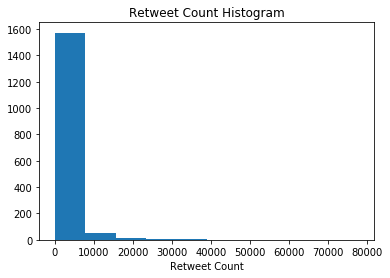

In [54]:
import matplotlib.pyplot as plt
plt.hist(df_final.retweet_count)
plt.title("Retweet Count Histogram")
plt.xlabel("Retweet Count")

### CLEANING STEPS ###

#### 1.> First all the three columns were merged based on the tweet_id.
#### 2.> Next the rows where there were images that were not of dogs were deleted.
#### 3.> The rows where the dogs were classified neither as a doggo or floofer or pupper or puppo were removed.
#### 4.> the rows were the retweeting was done were removed
#### 5.> The columns of retweeting (4 in number) were all removed.
#### 6.> The datatype of tweet_id was changed to string
#### 7.> The datatype of Datetime was changed to timestamp.
#### 8.> The multiple dog stages were merged into a dog_group column.
#### 9.>  The ratings were properly processed

#### DEFINE:

> Saving the clean dataset to a new csv file

In [55]:
df_final.to_csv('master_dataset.csv')